## CUSTOMER CHURN ANALYSIS


> # Inroduction


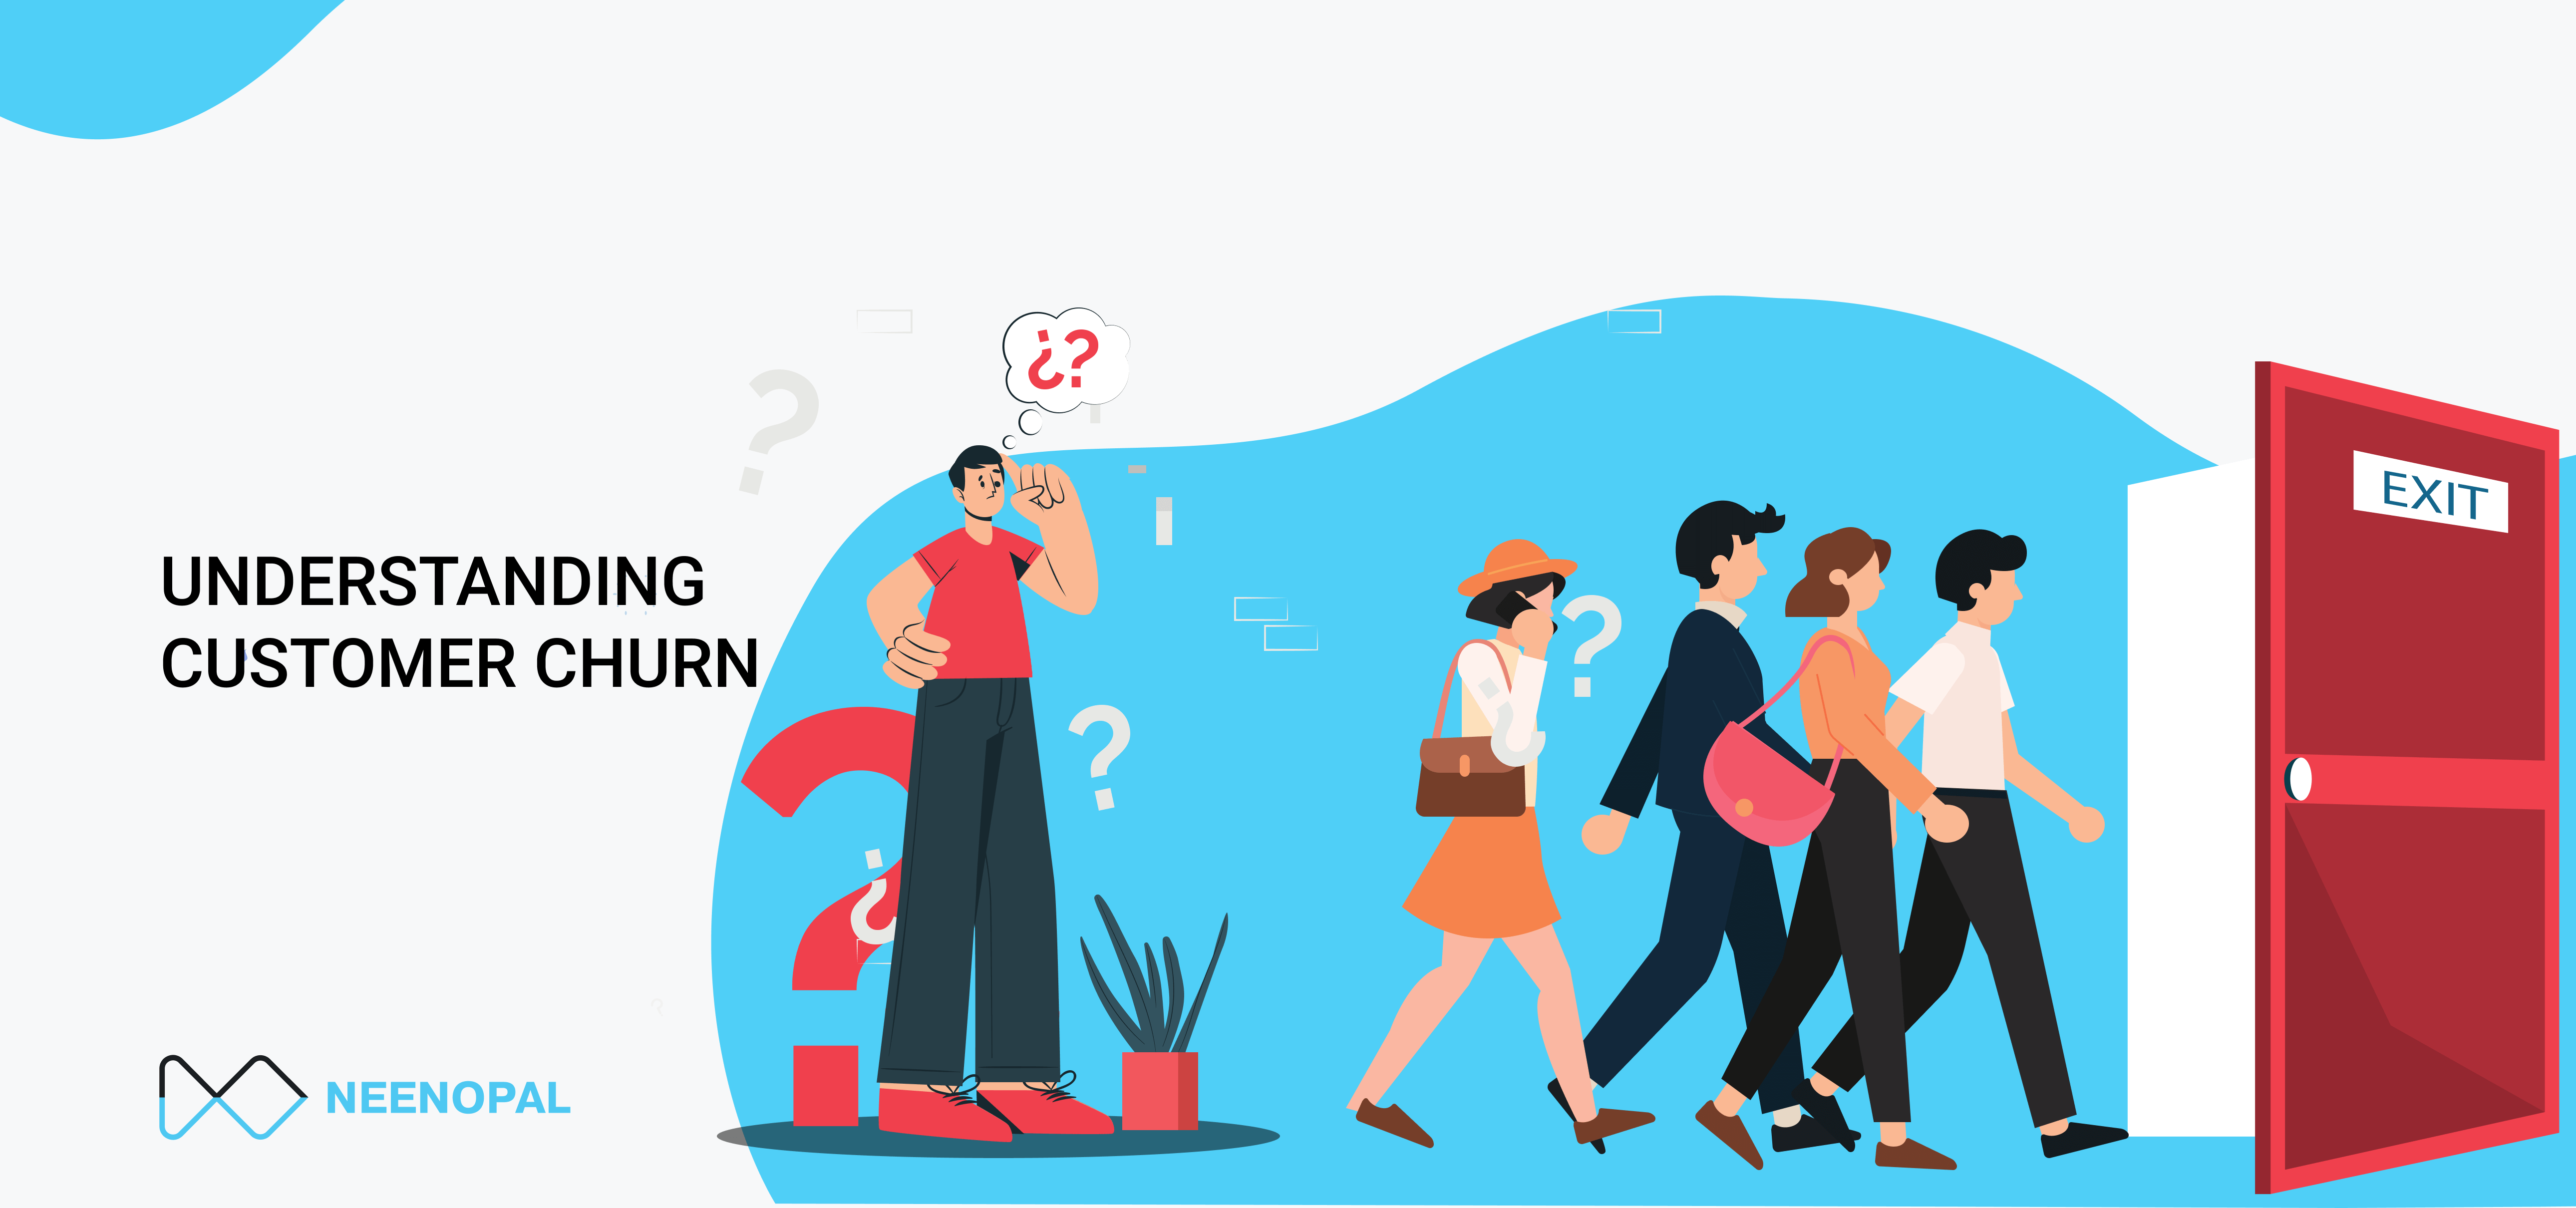

This is a Telco company which provides some services to its customers, its been reported that some customers have left and still leaving.
Identify the key predictors of churn to help the company implement targeted retention strategies and reduce customer attrition rates, analyze the case and figure out the reasons behind thier churn using the provided features.
Investigate factors influencing customer churn in the company by analysing customer information and their service usage.

# About the Data set:
- **Customers who left within the last month** – the column is called Churn

- **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


- **Demographic info about customers** – gender, age range, and if they have partners and dependents


> # Importing libraries:

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> # Reading the dataset:

In [104]:
df = pd.read_csv(r'C:\Users\yhomy\Downloads\Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


> # Data Exploration:


In [105]:
df.shape

(7043, 21)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [107]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

0 ==> Not a senior citizen

1 ==> is a senior citizen

In [108]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

> # Data Cleaning:

In [109]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [110]:
df.duplicated().sum()

0

convert senior citizen values:
- 1: "yes"
- 0: "no"

In [111]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1,"yes")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"no")


In [112]:
df["SeniorCitizen"].unique()

array(['no', 'yes'], dtype=object)

correct the data type of "TotalCharges"

In [113]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [114]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [ ]:
df["TotalCharges"].isnull().sum()

11

Found some missing values here, this is a small ratio to the size of the data and they were lost completly at random, so dropping them will not affect the data analysis.

In [ ]:
df.dropna(subset=["TotalCharges"], inplace=True)

In [ ]:
df["TotalCharges"].isnull().sum()

0

> # Exploring Data Anlysis:

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

1) What is the overall churn rate in company?

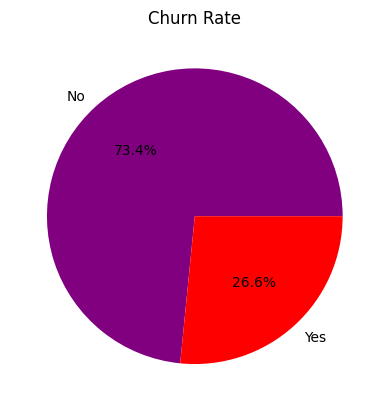

In [ ]:
churn_rate = df["Churn"].value_counts()
plt.pie(churn_rate.values, labels= churn_rate.index, colors=["purple", "red"] , autopct="%1.1f%%")
plt.title("Churn Rate")
plt.show()

**Insight:** about quarter of the customers left in last month

2) What is the gender ratio in the company?

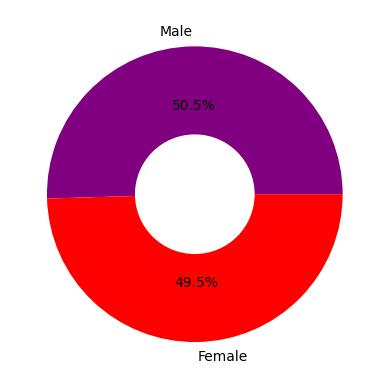

In [ ]:
gender_rate = df["gender"].value_counts()
# Create a pieplot
plt.pie(gender_rate.values, labels= gender_rate.index,colors=["purple", "red"] , autopct="%1.1f%%")

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

#Insight: the difference between gender volume is about 1%

3) How does the gender affect churn rate? is there a significant difference between males and females churn rate?

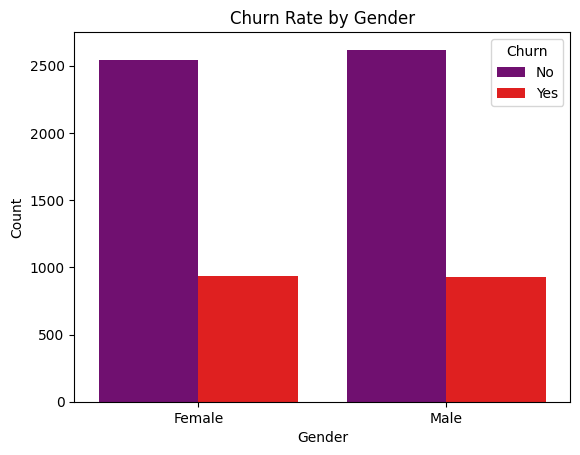

In [ ]:
sns.countplot(x = "gender", hue="Churn", data= df, palette={"No": "purple", "Yes": "red"})
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Insight**: they are both at a close ratio, this is obvious that there's no specific gender that is most likely to leave than the other

4) Does being a senior citizen influence the likelihood of churn rate?

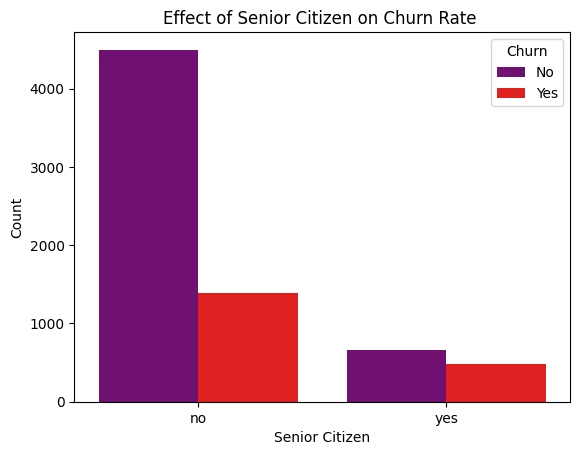

In [ ]:
sns.countplot(x = "SeniorCitizen", hue="Churn", data= df, palette={"No": "purple", "Yes": "red"})
plt.title("Effect of Senior Citizen on Churn Rate ")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

Insight: This shows that even though the ratio of senior citizens among the customers is lower, the likelihood of churn is high for senior citizens compared to non-senior citizens, but there's also a high chance that some senior citizens won't churn,

5) How much charges do the customers mostly pay?

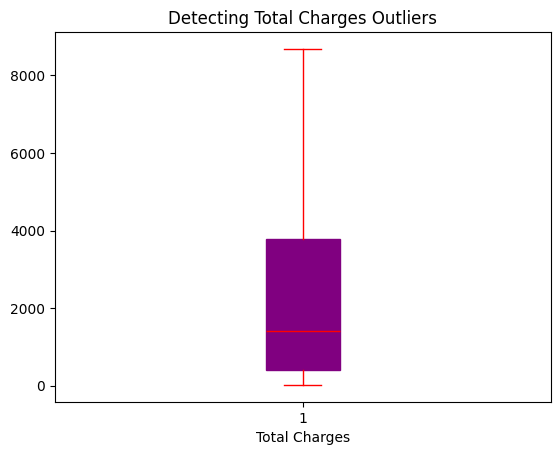

In [ ]:
plt.boxplot(df["TotalCharges"], patch_artist=True, boxprops=dict(facecolor="purple", color="purple"),
            medianprops=dict(color="red"), whiskerprops=dict(color="red"), capprops=dict(color="red"))
plt.title("Detecting Total Charges Outliers")
plt.xlabel("Total Charges")
plt.show()


Removing outliers so we could determine the total charges

Text(0.5, 0, 'Total Charges')

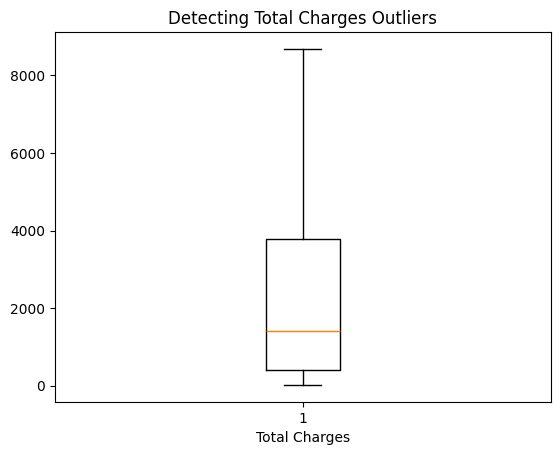

In [ ]:
plt.boxplot(df["TotalCharges"])
plt.title("Detecting Total Charges Outliers")
plt.xlabel("Total Charges")

**Insight:** It appears it has a skewed distribution, which shows that most of our customers pay less than 2000 charges. The number of customers decreases when it comes to high charges.

** Further analyse charges and churn rate

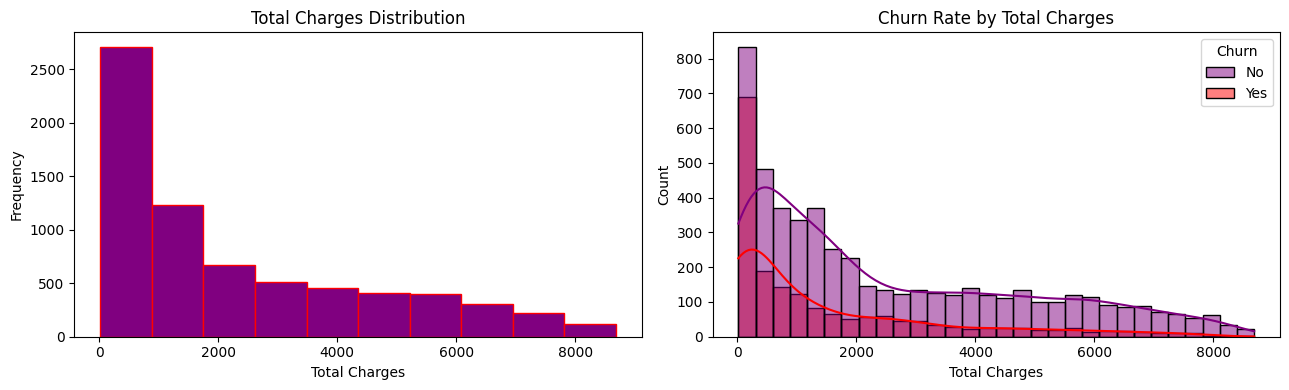

In [ ]:
# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# First subplot: Total Charges Distribution
axes[0].hist(df["TotalCharges"], color="purple", edgecolor="red")
axes[0].set_title("Total Charges Distribution")
axes[0].set_xlabel("Total Charges")
axes[0].set_ylabel("Frequency")

# Second subplot: Churn Rate by Total Charges
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, kde=True, palette={"No": "purple", "Yes": "red"}, ax=axes[1])
axes[1].set_title("Churn Rate by Total Charges")
axes[1].set_xlabel("Total Charges")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Insight: This shows that customers that pays above 8000 are likely to churn.

6) What is the distribution of churns across different categories of contract type?

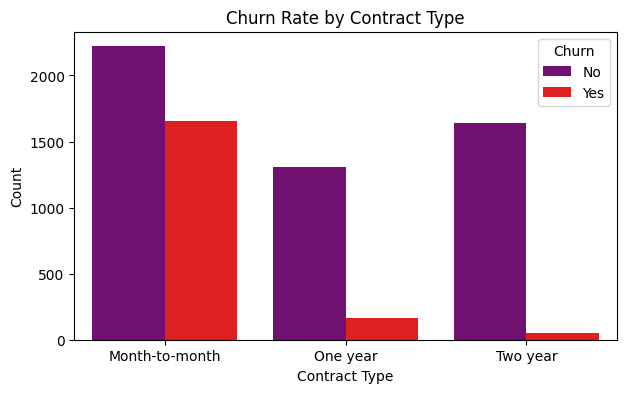

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette={"No": "purple", "Yes": "red"})
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

Insight: Calculating the overall churn rate by contract type shows contract within two years has the lowest volume while the monthly contract has the highest.

7) What is the relationship between the service usage of internet service and phone service churn?

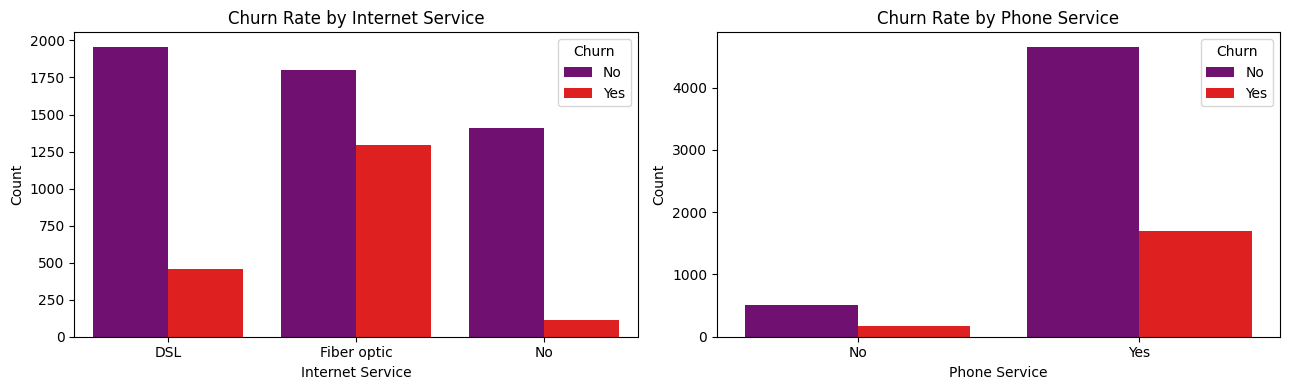

In [ ]:
# Service Usage Analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# Churn Rate by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df, palette={"No": "purple", "Yes": "red"}, ax=axes[0])
axes[0].set_title("Churn Rate by Internet Service")
axes[0].set_xlabel("Internet Service")
axes[0].set_ylabel("Count")

# Churn Rate by Phone Service
sns.countplot(x='PhoneService', hue='Churn', data=df, palette={"No": "purple", "Yes": "red"}, ax=axes[1])
axes[1].set_title("Churn Rate by Phone Service")
axes[1].set_xlabel("Phone Service")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Insight: Exploring the impact of service usage analysis, Phone service tends to have higher usage compare to internet service.

8) What is the impact on payment methods with churn?

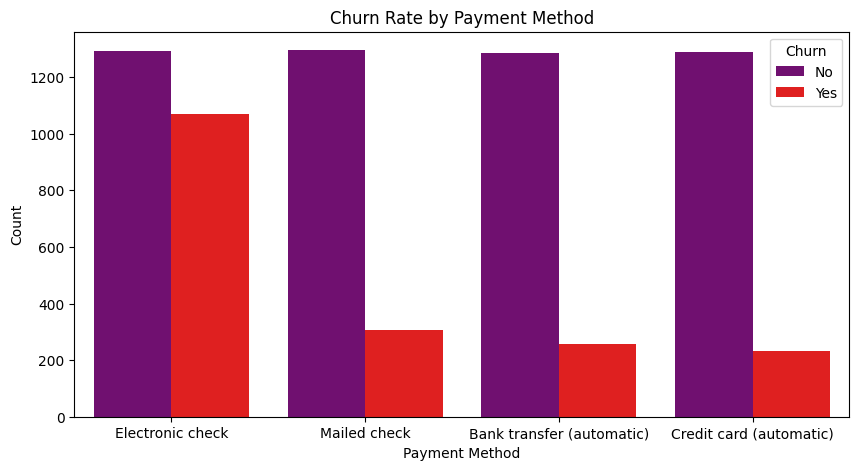

In [ ]:
# Billing and Payment Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette={"No": "purple", "Yes": "red"})
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

Insight: Exploring the relationship between billing-related factors of payment, credit card shows a decrease in volume, while electronic check shows the increase in churn.

9. Does having Tech Support impact churn rate & what is the churn rate of customers that stream movies?   

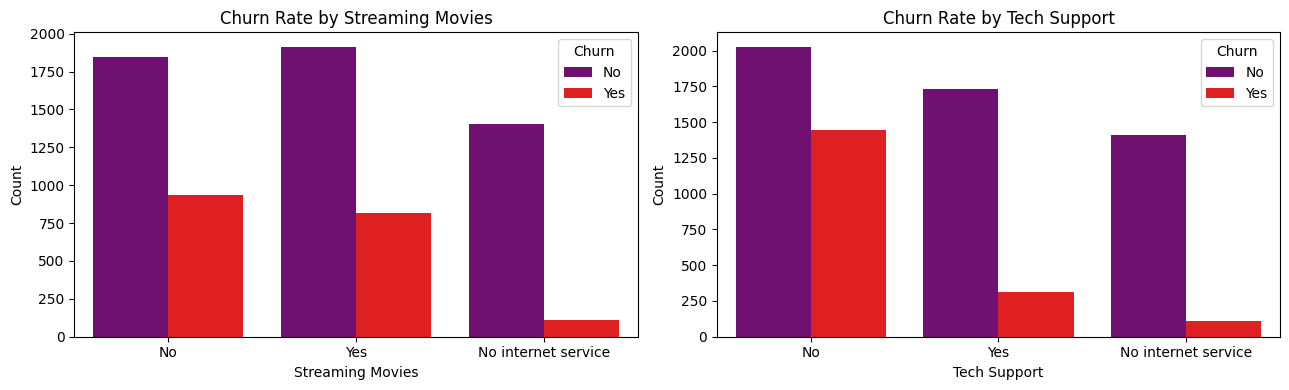

In [ ]:
# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# First subplot: Churn Rate by Streaming Movies
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette={"No": "purple", "Yes": "red"}, ax=axes[0])
axes[0].set_title("Churn Rate by Streaming Movies")
axes[0].set_xlabel("Streaming Movies")
axes[0].set_ylabel("Count")

# Second subplot: Churn Rate by Tech Support
sns.countplot(x='TechSupport', hue='Churn', data=df, palette={"No": "purple", "Yes": "red"}, ax=axes[1])
axes[1].set_title("Churn Rate by Tech Support")
axes[1].set_xlabel("Tech Support")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Insight: Exploring customers satisfaction, It appears that customers with no internet service tend to have a lower churn rate in streaming movies and tech support.

10. Are customers with partners less likely to churn compared to those without partners?

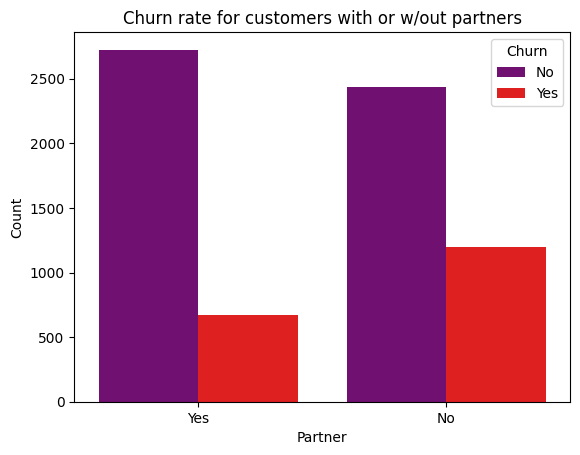

In [ ]:
sns.countplot(x= 'Partner', hue='Churn',data =df, palette={"No": "purple", "Yes": "red"})
plt.title('Churn rate for customers with or w/out partners')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

Insight: As the visulization reveals, even though the ratio of the customers without partners is lower, the likelihood of churn is high for them to compared with those with partners.

In [ ]:
## Lets work with dependents columns but firstly lets see the data type is therein
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

11. Does having dependents affect churn rate?

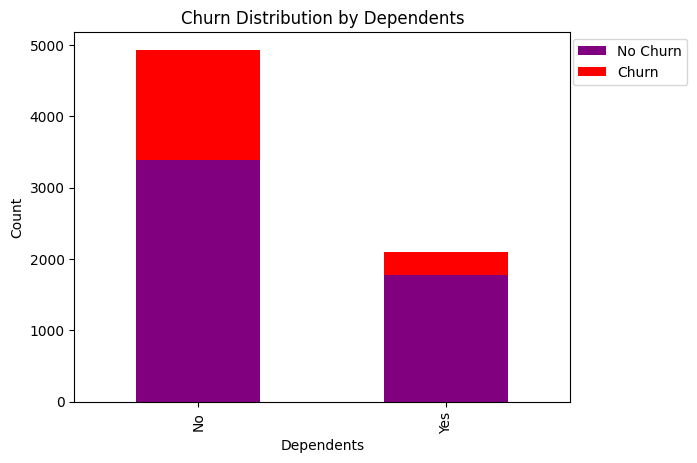

In [ ]:
# Set the color palette
colors = ['purple', 'red']

# Group by 'Dependents' and 'Churn'
df_grouped = df.groupby(['Dependents', 'Churn']).size().unstack()

# Plot a stacked bar chart using Matplotlib
ax = df_grouped.plot(kind='bar', stacked=True, color=colors)

plt.title('Churn Distribution by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Customize legend
ax.legend(['No Churn', 'Churn'], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()


Insight:This shows that most of our customers don't have dependents, and they are tend to leave compared to customers with dependents.

12. At what years of tenure do cutomers churn?

In [ ]:
##checking tenure column
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

C:\Users\yhomy\AppData\Local\Temp\ipykernel_16856\3293422855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Churn', y='tenure', data=df, palette={"No": "purple", "Yes": "red"})


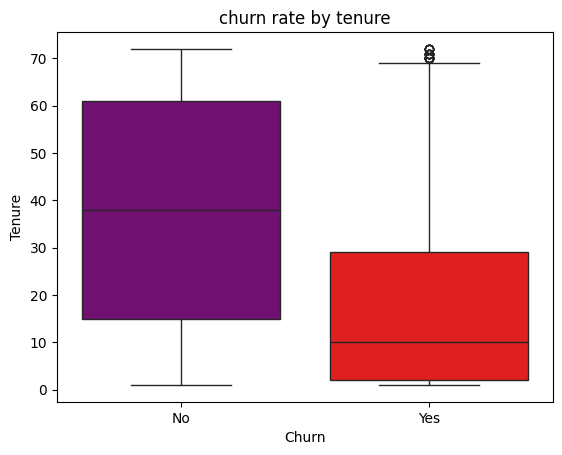

In [ ]:
sns.boxplot(x= 'Churn', y='tenure', data=df, palette={"No": "purple", "Yes": "red"})
plt.title('churn rate by tenure')
plt.ylabel('Tenure')
plt.xlabel('Churn')
plt.show()

Insight: The report shows that the lower the year customer spent the higher the churn rate, as this reveal 10 years, which implies there was no customer satifaction.

13. Does having multiple line inrease or decrease churn?

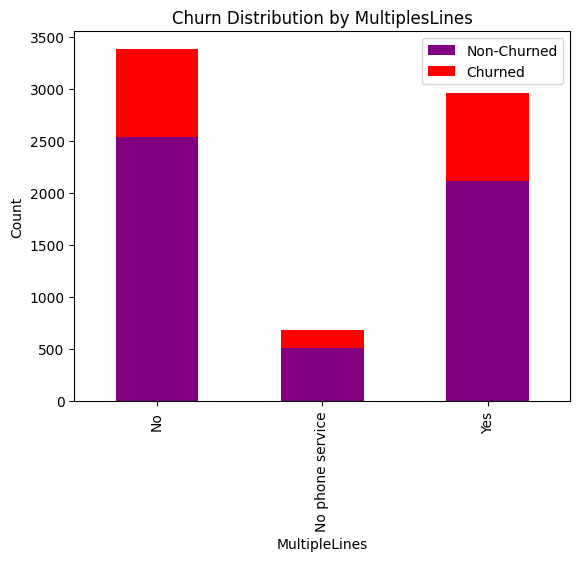

In [ ]:
colors = ['purple', 'red']
df_grouped = df.groupby(['MultipleLines','Churn']).size().unstack()
df_grouped.plot(kind ='bar', stacked=True, color=colors)
plt.title('Churn Distribution by MultiplesLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.legend(['Non-Churned', 'Churned'])

Insight: The portion of the customers who have phone services but with no multiple lines is a little higher than those who have multiple lines, it also shows that some of the customers dont have phone service, which makes no significant different betweeen churning rate and the distribution of multiple lines.

14. What internet service provider has the highest churn rate?

In [ ]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

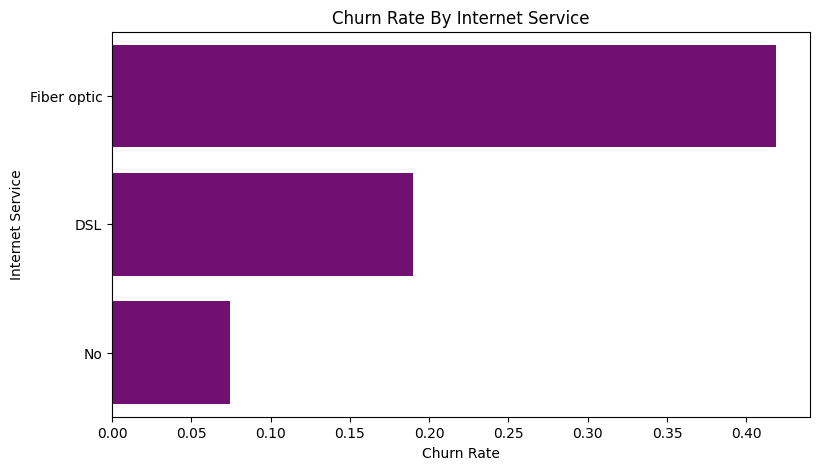

In [ ]:
# Create a binary 'churn_N' column
df['churn_N'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Group by 'InternetService' and calculate the mean of 'churn_N'
internet_churn = df.groupby('InternetService')['churn_N'].mean().reset_index()

# Sort the DataFrame by 'churn_N' in descending order
internet_churn = internet_churn.sort_values('churn_N', ascending=False)

# Plot a bar chart
plt.figure(figsize=(9, 5))
sns.barplot(x='churn_N', y='InternetService', data=internet_churn, color='purple')

plt.xlabel('Churn Rate')
plt.ylabel('Internet Service')
plt.title('Churn Rate By Internet Service')

plt.show()


Insight: Based on the visualization, it seems that the highest portion of churning custers were using Fiber Optic as an internet provider

15. Do customers with online security tend to churn less frequently?

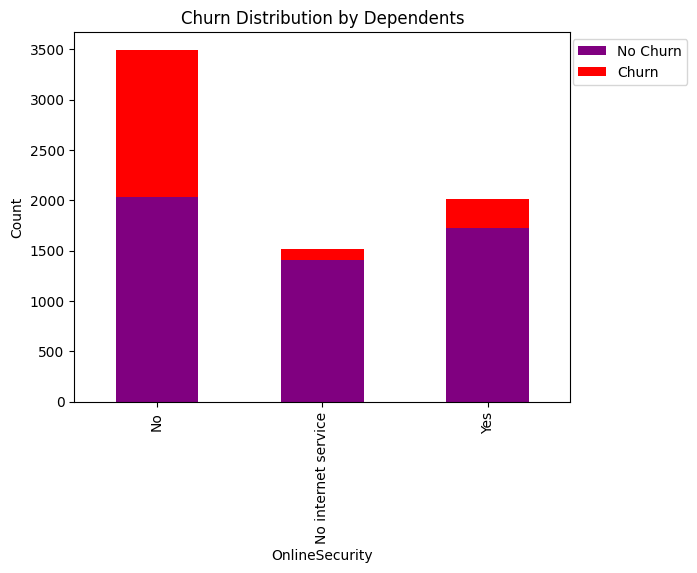

In [ ]:
df_grouped = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()
ax = df_grouped.plot(kind='bar', stacked=True, color=colors)
plt.title('Churn Distribution by Dependents')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
ax.legend(['No Churn', 'Churn'], loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

Insight: The larger ratio of the customers dont have Online Security service, and it appears that they tend to churn more than the customers with Online Security.

## Recommendation
Based on the analysis, Its recommended that the Telco company focuses on improving customer satisfaction through personalized communication, adressing service quality issues, and offering incentives for long-term committement.
Implement a proactive churn prevention strategies, such as promotions and active customer support, which can help metigate churn rates and improve overall customer retention. 
Features that have an influence on the churn rate were:
SeniorCitizen: yes,
Partner: no,
Dependents: no,
Tenure: Low tenure,
InternetService: Fiber optic,
OnlineSecurity: no.

Features that dont have an influence on the churn rate:
Gender,
PhoneService,
MultipleLines.


## Conclusion
The analysis highlighted several significant factors contributing to customer churn, including contract type, service usage paqtterns, customer demograqph. By understanding these factors and implementing targeted retention efforts, the company can reduce churn rates, enhance customer loyalty, and ultimately improve its bottom line.